<a href="https://colab.research.google.com/github/shubh45-nandan/Meta-learning-Based-CRC-/blob/main/Meta_learning_DENSENET121.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

print("Contents of MyDrive:")
for item in os.listdir("/content/drive/MyDrive"):
    print(item)


Contents of MyDrive:
archive.zip
Colab Notebooks
RL_CNN_Research


In [ ]:
!unzip "/content/drive/MyDrive/archive.zip" -d "/content/drive/MyDrive/"


Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/01_TUMOR/103F_CRC-Prim-HE-02_025.tif_Row_1_Col_301.tif  
  inflating: /content/drive/MyDrive/kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/01_TUMOR/103F_CRC-Prim-HE-10_013.tif_Row_151_Col_1.tif  
  inflating: /content/drive/MyDrive/kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/01_TUMOR/10437_CRC-Prim-HE-02_028.tif_Row_151_Col_451.tif  
  inflating: /content/drive/MyDrive/kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/01_TUMOR/104D5_CRC-Prim-HE-09_024.tif_Row_451_Col_151.tif  
  inflating: /content/drive/MyDrive/kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000/01_TUMOR/1055E_CRC-Prim-HE-01_027.tif_Row_151_Col_301.tif  
  inflating: /content/drive/MyDrive/kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_

In [ ]:
import os

print("Contents of MyDrive after unzip:")
for item in os.listdir("/content/drive/MyDrive"):
    print(item)


Contents of MyDrive after unzip:
archive.zip
Colab Notebooks
RL_CNN_Research
Kather_texture_2016_image_tiles_5000
Kather_texture_2016_larger_images_10
hmnist_28_28_L.csv
hmnist_28_28_RGB.csv
hmnist_64_64_L.csv
hmnist_8_8_L.csv
hmnist_8_8_RGB.csv
kather_texture_2016_image_tiles_5000
kather_texture_2016_larger_images_10


In [ ]:
import os, glob, pprint

candidates = [
    "/content/drive/MyDrive/Kather_texture_2016_image_tiles_5000",
    "/content/drive/MyDrive/kather_texture_2016_image_tiles_5000",
    "/content/drive/MyDrive/Kather_texture_2016_larger_images_10",
    "/content/drive/MyDrive/kather_texture_2016_larger_images_10",
]

found = []
for p in candidates:
    if os.path.exists(p):
        # list immediate children
        children = sorted(os.listdir(p))
        n_children = len(children)
        # check how many children are directories vs files
        n_dirs = sum(1 for c in children if os.path.isdir(os.path.join(p, c)))
        n_files = sum(1 for c in children if os.path.isfile(os.path.join(p, c)))
        sample_children = children[:10]
        found.append((p, n_children, n_dirs, n_files, sample_children))

if not found:
    print("None of the expected candidate folders exist. Here are top-level MyDrive items:")
    for item in sorted(os.listdir("/content/drive/MyDrive")):
        print(" -", item)
else:
    print("Detected candidate dataset folders (summary):\n")
    for info in found:
        p, n_children, n_dirs, n_files, sample_children = info
        print(f"PATH: {p}")
        print(f"  total children: {n_children}  (dirs: {n_dirs}, files: {n_files})")
        print(f"  sample children (up to 10): {sample_children}")
        # if there are directories, show first directory contents
        if n_dirs > 0:
            first_dir = os.path.join(p, sample_children[0])
            # protect if sample_children[0] is a file
            if os.path.isdir(first_dir):
                subkids = sorted(os.listdir(first_dir))[:10]
                print(f"    -> '{sample_children[0]}' contents (up to 10): {subkids}")
        print()

# also, if any candidate folder looks like class-folder (many directories), pick the best guess
best = None
best_score = -1
for pinfo in found:
    p, n_children, n_dirs, n_files, _ = pinfo
    score = n_dirs  # prefer many subdirectories (class folders)
    if score > best_score:
        best_score = score
        best = p
if best:
    print("Auto-selected dataset_root guess:", best)
else:
    print("No suitable dataset folder auto-selected. Paste the exact folder you want to use.")


Detected candidate dataset folders (summary):

PATH: /content/drive/MyDrive/Kather_texture_2016_image_tiles_5000
  total children: 1  (dirs: 1, files: 0)
  sample children (up to 10): ['Kather_texture_2016_image_tiles_5000']
    -> 'Kather_texture_2016_image_tiles_5000' contents (up to 10): ['01_TUMOR', '02_STROMA', '03_COMPLEX', '04_LYMPHO', '05_DEBRIS', '06_MUCOSA', '07_ADIPOSE', '08_EMPTY']

PATH: /content/drive/MyDrive/kather_texture_2016_image_tiles_5000
  total children: 1  (dirs: 1, files: 0)
  sample children (up to 10): ['Kather_texture_2016_image_tiles_5000']
    -> 'Kather_texture_2016_image_tiles_5000' contents (up to 10): ['01_TUMOR', '02_STROMA', '03_COMPLEX', '04_LYMPHO', '05_DEBRIS', '06_MUCOSA', '07_ADIPOSE', '08_EMPTY']

PATH: /content/drive/MyDrive/Kather_texture_2016_larger_images_10
  total children: 1  (dirs: 1, files: 0)
  sample children (up to 10): ['Kather_texture_2016_larger_images_10']
    -> 'Kather_texture_2016_larger_images_10' contents (up to 10): ['CRC-

In [ ]:
import os, glob

DATASET_ROOT = "/content/drive/MyDrive/Kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000"

print("Dataset root:", DATASET_ROOT)

# List classes
classes = sorted([d for d in os.listdir(DATASET_ROOT) if os.path.isdir(os.path.join(DATASET_ROOT, d))])
print("Found classes:", classes)
print("Number of classes:", len(classes))

# Count images per class
for c in classes:
    files = glob.glob(os.path.join(DATASET_ROOT, c, "*"))
    print(f"{c}: {len(files)} images")


Dataset root: /content/drive/MyDrive/Kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000
Found classes: ['01_TUMOR', '02_STROMA', '03_COMPLEX', '04_LYMPHO', '05_DEBRIS', '06_MUCOSA', '07_ADIPOSE', '08_EMPTY']
Number of classes: 8
01_TUMOR: 625 images
02_STROMA: 625 images
03_COMPLEX: 625 images
04_LYMPHO: 625 images
05_DEBRIS: 625 images
06_MUCOSA: 625 images
07_ADIPOSE: 625 images
08_EMPTY: 625 images


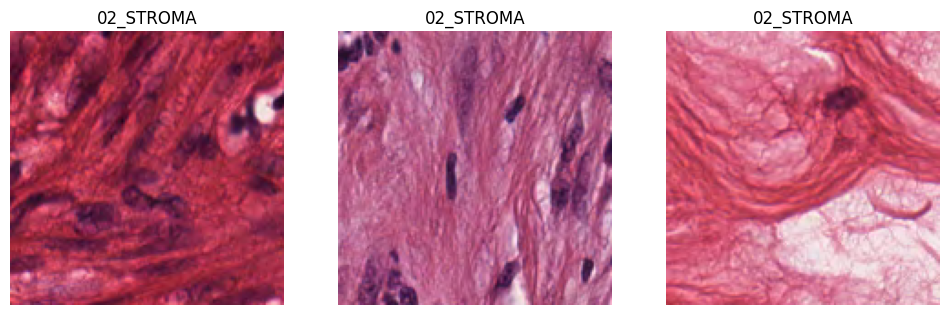

Image loading test completed successfully.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import os

DATASET_ROOT = "/content/drive/MyDrive/Kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000"

# Pick random class
cls = random.choice(os.listdir(DATASET_ROOT))
cls_path = os.path.join(DATASET_ROOT, cls)

# Pick 3 random images from that class
files = [os.path.join(cls_path, f) for f in os.listdir(cls_path)]
chosen_files = random.sample(files, 3)

plt.figure(figsize=(12,4))
for i, img_path in enumerate(chosen_files):
    img = cv2.imread(img_path)
    if img is None:
        raise ValueError(f"Failed to load image: {img_path}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 3, i+1)
    plt.imshow(img)
    plt.title(f"{cls}")
    plt.axis("off")

plt.show()
print("Image loading test completed successfully.")


In [ ]:
# CELL A: constants + clear session
import os, random, glob, cv2, numpy as np, tensorflow as tf
from tensorflow.keras import backend as K

# Force clear previous TF graphs (important)
K.clear_session()
tf.random.set_seed(42)
random.seed(42)
np.random.seed(42)

# Paths (already confirmed)
DATASET_ROOT = "/content/drive/MyDrive/Kather_texture_2016_image_tiles_5000/Kather_texture_2016_image_tiles_5000"
RESULTS_PATH = "/content/drive/MyDrive/PROTO_RESULTS_DENSENET"
os.makedirs(RESULTS_PATH, exist_ok=True)

# SAFE denseNet meta-learning config (Colab-friendly)
IMG_SIZE = 112        # MUST match loader and model input
EMBED_DIM = 256
N_WAY = 3
K_SHOT = 3
Q_QUERY = 3

META_EPOCHS = 40
EPISODES_PER_EPOCH = 10
INNER_LR = 1e-4
BATCH_SIZE = 32

print("Constants set. IMG_SIZE=", IMG_SIZE, " N_WAY,K_SHOT,Q_QUERY=", N_WAY, K_SHOT, Q_QUERY)


Constants set. IMG_SIZE= 112  N_WAY,K_SHOT,Q_QUERY= 3 3 3


In [ ]:
# CELL B: build frozen DenseNet121 embedding
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Lambda
from tensorflow.keras.models import Model

def build_embedding_model(img_size=IMG_SIZE, embed_dim=EMBED_DIM):
    base = DenseNet121(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
    # Freeze entire backbone (critical for memory)
    for layer in base.layers:
        layer.trainable = False

    x = GlobalAveragePooling2D()(base.output)
    x = Dense(embed_dim, name="embedding_dense")(x)
    x = Lambda(lambda t: tf.math.l2_normalize(t, axis=1), name="l2norm")(x)
    model = Model(inputs=base.input, outputs=x, name="DenseNet121_Embed")
    return model

embedding_model = build_embedding_model()
embedding_model.summary()


Model: "DenseNet121_Embed"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 112, 112,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 118, 118,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 56, 56,    │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 56, 56,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 56, 56,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 58, 58,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 28, 28,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 28, 28,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 28, 28,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 28, 28,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 28, 28,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 28, 28,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 28, 28,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 28, 28,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 28, 28,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 28, 28,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 28, 28,    │     12,288 │ conv2_block2_0_r

 Total params: 7,299,904 (27.85 MB)

 Trainable params: 262,400 (1.00 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [ ]:
# CELL C: loader and episode sampler (ENFORCES IMG_SIZE and resample classes each episode)
import os, random, glob
from typing import Tuple

classes = sorted([c for c in os.listdir(DATASET_ROOT) if os.path.isdir(os.path.join(DATASET_ROOT, c))])
print("Detected classes:", classes)

valid_exts = ('.jpg','.jpeg','.png','.bmp','.tif','.tiff')

def load_img(path: str) -> np.ndarray:
    img = cv2.imread(path)
    if img is None:
        # try fallback read; if still fails, return zeros
        try:
            img = cv2.imdecode(np.fromfile(path, dtype=np.uint8), cv2.IMREAD_COLOR)
        except Exception:
            img = None
    if img is None:
        print("Warning: cannot read", path)
        img = np.zeros((IMG_SIZE, IMG_SIZE, 3), dtype=np.uint8)
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    return img.astype("float32") / 255.0

def sample_episode(n_way=N_WAY, k_shot=K_SHOT, q_query=Q_QUERY) -> Tuple[np.ndarray,np.ndarray,np.ndarray,np.ndarray]:
    chosen_classes = random.sample(classes, n_way)  # sample per episode
    support_images, support_labels = [], []
    query_images, query_labels = [], []

    for label_idx, cls in enumerate(chosen_classes):
        cls_path = os.path.join(DATASET_ROOT, cls)
        all_imgs = [f for f in glob.glob(os.path.join(cls_path, "*")) if os.path.splitext(f)[1].lower() in valid_exts]
        if len(all_imgs) < (k_shot + q_query):
            chosen_paths = list(np.random.choice(all_imgs, k_shot + q_query, replace=True))
        else:
            chosen_paths = random.sample(all_imgs, k_shot + q_query)
        spaths = chosen_paths[:k_shot]
        qpaths = chosen_paths[k_shot:]
        for p in spaths:
            support_images.append(load_img(p))
            support_labels.append(label_idx)
        for p in qpaths:
            query_images.append(load_img(p))
            query_labels.append(label_idx)

    return (np.array(support_images), np.array(support_labels),
            np.array(query_images),  np.array(query_labels))

# Quick sanity sample
s_x, s_y, q_x, q_y = sample_episode()
print("Sanity sample shapes -> support:", s_x.shape, " query:", q_x.shape)


Detected classes: ['01_TUMOR', '02_STROMA', '03_COMPLEX', '04_LYMPHO', '05_DEBRIS', '06_MUCOSA', '07_ADIPOSE', '08_EMPTY']
Sanity sample shapes -> support: (9, 112, 112, 3)  query: (9, 112, 112, 3)


In [ ]:
# CELL D: sanity forward pass (no training) to ensure shapes and model accept inputs
s_emb = embedding_model.predict(s_x, batch_size=BATCH_SIZE, verbose=0)
q_emb = embedding_model.predict(q_x, batch_size=BATCH_SIZE, verbose=0)
print("Support emb shape:", s_emb.shape, " Query emb shape:", q_emb.shape)
# Compute prototypes and one accuracy value
protos = []
for i in range(N_WAY):
    protos.append(np.mean(s_emb[s_y==i], axis=0))
protos = np.stack(protos, axis=0)
dists = np.sum((q_emb[:,None,:] - protos[None,:,:])**2, axis=2)
preds = np.argmin(dists, axis=1)
acc = np.mean(preds == q_y)
print("Sanity episode accuracy (untrained):", acc)


Support emb shape: (9, 256)  Query emb shape: (9, 256)
Sanity episode accuracy (untrained): 0.7777777777777778


In [ ]:
# CELL E: OOM-safe proto-net training (DenseNet frozen; only head trains)
from tensorflow.keras.optimizers import Adam

optimizer = Adam(INNER_LR)
train_loss_history = []
train_acc_history = []
val_acc_history = []
val_loss_history = []

def run_episode_train():
    support_x, support_y, query_x, query_y = sample_episode()
    support_x = tf.convert_to_tensor(support_x, dtype=tf.float32)
    query_x   = tf.convert_to_tensor(query_x, dtype=tf.float32)

    with tf.GradientTape() as tape:
        support_emb = embedding_model(support_x, training=True)
        query_emb   = embedding_model(query_x,  training=True)

        prototypes = []
        for i in range(N_WAY):
            prototypes.append(tf.reduce_mean(tf.gather(support_emb, tf.where(tf.equal(support_y, i))[:,0]), axis=0))
        prototypes = tf.stack(prototypes, axis=0)  # (N_way, D)

        dists = tf.reduce_sum((tf.expand_dims(query_emb,1) - tf.expand_dims(prototypes,0))**2, axis=2)
        log_p_y = tf.nn.log_softmax(-dists, axis=1)
        labels_one_hot = tf.one_hot(query_y, depth=N_WAY)
        loss = -tf.reduce_mean(tf.reduce_sum(labels_one_hot * log_p_y, axis=1))

    # Only compute gradients for trainable vars (embedding head is trainable; base is frozen)
    grads = tape.gradient(loss, embedding_model.trainable_variables)
    optimizer.apply_gradients(zip(grads, embedding_model.trainable_variables))

    preds = tf.argmax(log_p_y, axis=1)
    acc = tf.reduce_mean(tf.cast(preds == query_y, tf.float32))
    return float(loss), float(acc)

print("Starting optimized DenseNet training...")
for epoch in range(1, META_EPOCHS + 1):
    epoch_losses, epoch_accs = [], []
    for _ in range(EPISODES_PER_EPOCH):
        loss, acc = run_episode_train()
        epoch_losses.append(loss); epoch_accs.append(acc)
    mean_loss = np.mean(epoch_losses); mean_acc = np.mean(epoch_accs)
    train_loss_history.append(mean_loss); train_acc_history.append(mean_acc)

    # quick validation (10 episodes)
    val_accs = []
    for _ in range(10):
        s_x, s_y, q_x, q_y = sample_episode()
        s_emb = embedding_model.predict(s_x, batch_size=BATCH_SIZE, verbose=0)
        q_emb = embedding_model.predict(q_x, batch_size=BATCH_SIZE, verbose=0)
        protos = [np.mean(s_emb[s_y==i], axis=0) for i in range(N_WAY)]
        protos = np.stack(protos)
        d = np.sum((q_emb[:,None,:] - protos[None,:,:])**2, axis=2)
        preds = np.argmin(d, axis=1)
        val_accs.append(np.mean(preds == q_y))
    val_mean = np.mean(val_accs); val_acc_history.append(val_mean)

    print(f"Epoch {epoch}/{META_EPOCHS}  Loss:{mean_loss:.4f} TrainAcc:{mean_acc:.4f} ValAcc:{val_mean:.4f}")

    # checkpoint head weights
    embedding_model.save(os.path.join(RESULTS_PATH, f"embedding_epoch_{epoch}.h5"))

print("Training done. Models & results saved to", RESULTS_PATH)


Starting optimized DenseNet training...


Epoch 1/40  Loss:0.6537 TrainAcc:0.9111 ValAcc:0.7556


Epoch 2/40  Loss:0.7658 TrainAcc:0.7889 ValAcc:0.8111


Epoch 3/40  Loss:0.7165 TrainAcc:0.8222 ValAcc:0.7444


Epoch 4/40  Loss:0.6343 TrainAcc:0.9000 ValAcc:0.8667


Epoch 5/40  Loss:0.6081 TrainAcc:0.8556 ValAcc:0.8222


Epoch 6/40  Loss:0.7543 TrainAcc:0.8333 ValAcc:0.9222


Epoch 7/40  Loss:0.6647 TrainAcc:0.8333 ValAcc:0.8000


Epoch 8/40  Loss:0.7079 TrainAcc:0.7778 ValAcc:0.9222


Epoch 9/40  Loss:0.5879 TrainAcc:0.8778 ValAcc:0.7889


Epoch 10/40  Loss:0.6018 TrainAcc:0.8556 ValAcc:0.8444


Epoch 11/40  Loss:0.4976 TrainAcc:0.9000 ValAcc:0.8556


Epoch 12/40  Loss:0.6563 TrainAcc:0.8000 ValAcc:0.8333


Epoch 13/40  Loss:0.5580 TrainAcc:0.8778 ValAcc:0.8222


Epoch 14/40  Loss:0.6595 TrainAcc:0.8333 ValAcc:0.8333


Epoch 15/40  Loss:0.5900 TrainAcc:0.8556 ValAcc:0.8667


Epoch 16/40  Loss:0.6263 TrainAcc:0.8667 ValAcc:0.8556


Epoch 17/40  Loss:0.5832 TrainAcc:0.8444 ValAcc:0.8333


Epoch 18/40  Loss:0.5246 TrainAcc:0.9222 ValAcc:0.8222


Epoch 19/40  Loss:0.7135 TrainAcc:0.7889 ValAcc:0.8333


Epoch 20/40  Loss:0.5853 TrainAcc:0.9111 ValAcc:0.8667


Epoch 21/40  Loss:0.4865 TrainAcc:0.9000 ValAcc:0.9111


Epoch 22/40  Loss:0.6058 TrainAcc:0.8889 ValAcc:0.8667


Epoch 23/40  Loss:0.5543 TrainAcc:0.8778 ValAcc:0.9111


Epoch 24/40  Loss:0.5543 TrainAcc:0.8444 ValAcc:0.8778


Epoch 25/40  Loss:0.6522 TrainAcc:0.8222 ValAcc:0.8778


Epoch 26/40  Loss:0.6357 TrainAcc:0.8556 ValAcc:0.8667


Epoch 27/40  Loss:0.5565 TrainAcc:0.8667 ValAcc:0.8444


Epoch 28/40  Loss:0.6385 TrainAcc:0.8444 ValAcc:0.9444


Epoch 29/40  Loss:0.6256 TrainAcc:0.8667 ValAcc:0.8000


Epoch 30/40  Loss:0.6389 TrainAcc:0.8889 ValAcc:0.8889


Epoch 31/40  Loss:0.5771 TrainAcc:0.8889 ValAcc:0.9333


Epoch 32/40  Loss:0.5394 TrainAcc:0.9111 ValAcc:0.8889


Epoch 33/40  Loss:0.4709 TrainAcc:0.9000 ValAcc:0.8778


Epoch 34/40  Loss:0.5572 TrainAcc:0.8444 ValAcc:0.8778


Epoch 35/40  Loss:0.6681 TrainAcc:0.8444 ValAcc:0.8556


Epoch 36/40  Loss:0.5594 TrainAcc:0.8667 ValAcc:0.9000


Epoch 37/40  Loss:0.5862 TrainAcc:0.8444 ValAcc:0.8778


Epoch 38/40  Loss:0.4520 TrainAcc:0.8889 ValAcc:0.8889


Epoch 39/40  Loss:0.5801 TrainAcc:0.8778 ValAcc:0.8667


Epoch 40/40  Loss:0.5503 TrainAcc:0.8556 ValAcc:0.9111
Training done. Models & results saved to /content/drive/MyDrive/PROTO_RESULTS_DENSENET


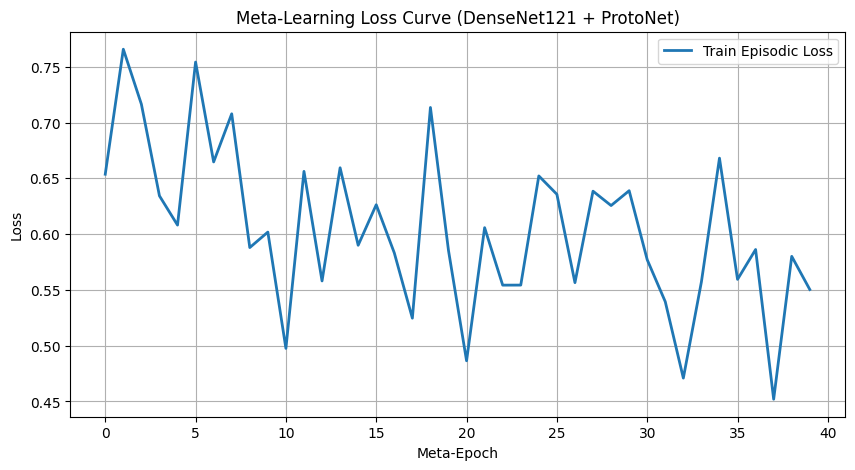

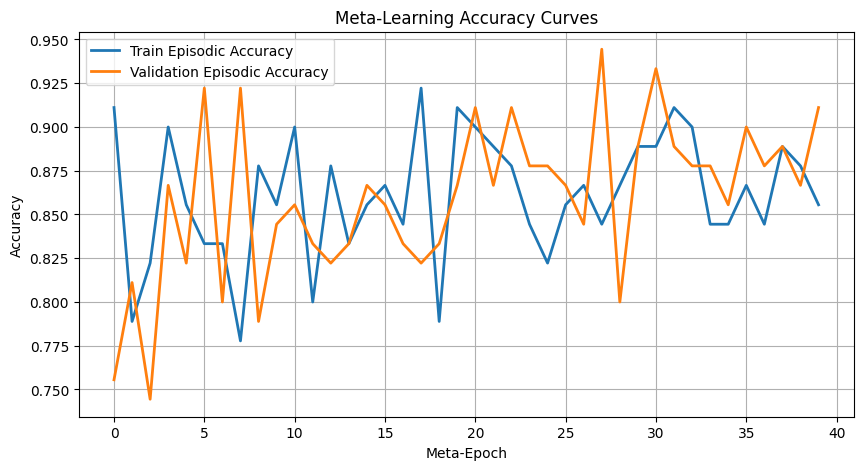

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Convert to numpy arrays (if they aren't already)
loss_curve = np.array(train_loss_history)
train_acc_curve = np.array(train_acc_history)
val_acc_curve = np.array(val_acc_history)

plt.figure(figsize=(10,5))
plt.plot(loss_curve, label="Train Episodic Loss", linewidth=2)
plt.xlabel("Meta-Epoch")
plt.ylabel("Loss")
plt.title("Meta-Learning Loss Curve (DenseNet121 + ProtoNet)")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(train_acc_curve, label="Train Episodic Accuracy", linewidth=2)
plt.plot(val_acc_curve,   label="Validation Episodic Accuracy", linewidth=2)
plt.xlabel("Meta-Epoch")
plt.ylabel("Accuracy")
plt.title("Meta-Learning Accuracy Curves")
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
import numpy as np
import glob, os

print("Computing class prototypes...")

class_prototypes = {}
valid_exts = ('.jpg','.jpeg','.png','.bmp','.tif','.tiff')

for c in classes:
    cls_path = os.path.join(DATASET_ROOT, c)
    files = [f for f in glob.glob(os.path.join(cls_path, "*")) if os.path.splitext(f)[1].lower() in valid_exts]

    # use up to 200 images per class for speed
    if len(files) > 200:
        files = random.sample(files, 200)

    imgs = np.array([load_img(p) for p in files])
    emb = embedding_model.predict(imgs, batch_size=32, verbose=0)

    class_prototypes[c] = np.mean(emb, axis=0)

print("✔ Prototypes computed for all classes.")


Computing class prototypes...
✔ Prototypes computed for all classes.


Evaluating full dataset with final model...


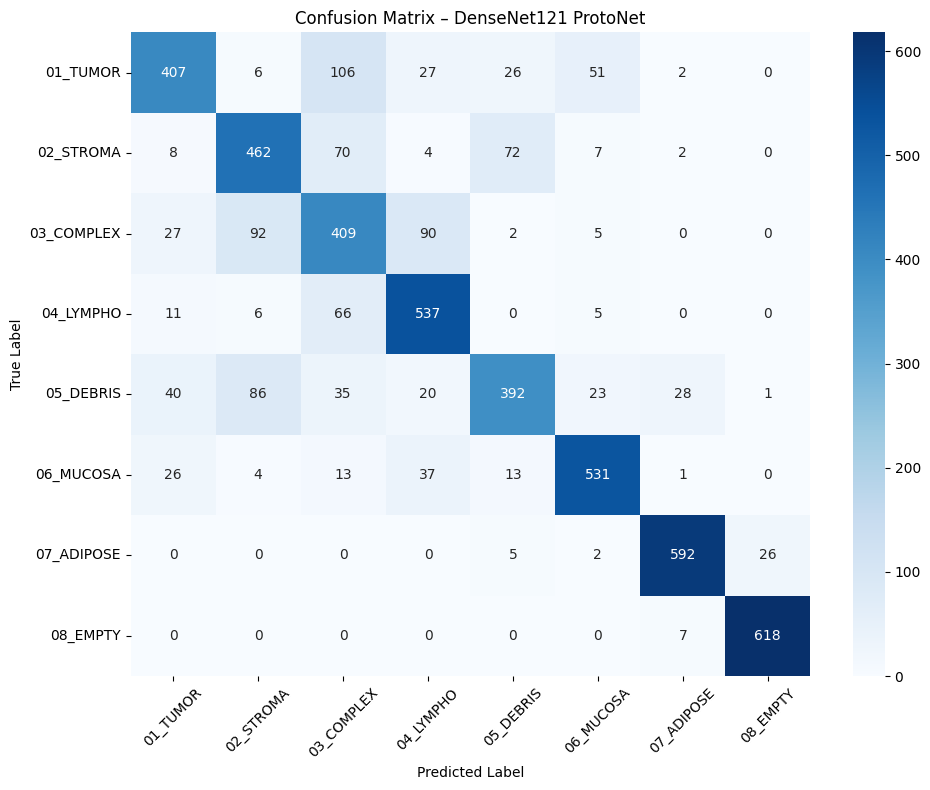

              precision    recall  f1-score   support

    01_TUMOR     0.7842    0.6512    0.7115       625
   02_STROMA     0.7043    0.7392    0.7213       625
  03_COMPLEX     0.5851    0.6544    0.6178       625
   04_LYMPHO     0.7510    0.8592    0.8015       625
   05_DEBRIS     0.7686    0.6272    0.6907       625
   06_MUCOSA     0.8510    0.8496    0.8503       625
  07_ADIPOSE     0.9367    0.9472    0.9419       625
    08_EMPTY     0.9581    0.9888    0.9732       625

    accuracy                         0.7896      5000
   macro avg     0.7924    0.7896    0.7885      5000
weighted avg     0.7924    0.7896    0.7885      5000


Confusion matrix and report saved to: /content/drive/MyDrive/PROTO_RESULTS_DENSENET


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import glob, cv2, os

print("Evaluating full dataset with final model...")

y_true = []
y_pred = []

for idx, c in enumerate(classes):
    cls_path = os.path.join(DATASET_ROOT, c)
    files = [f for f in glob.glob(os.path.join(cls_path, "*")) if os.path.splitext(f)[1].lower() in valid_exts]

    for p in files:
        img = load_img(p)
        emb = embedding_model.predict(img[None], verbose=0)[0]

        # compute distances
        dists = [np.sum((emb - class_prototypes[c2])**2) for c2 in classes]
        pred_idx = int(np.argmin(dists))

        y_true.append(idx)
        y_pred.append(pred_idx)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix – DenseNet121 ProtoNet")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig(os.path.join(RESULTS_PATH, "confusion_matrix.png"))
plt.show()

report = classification_report(y_true, y_pred, target_names=classes, digits=4)
print(report)

with open(os.path.join(RESULTS_PATH, "classification_report.txt"), "w") as f:
    f.write(report)

print("\nConfusion matrix and report saved to:", RESULTS_PATH)
